In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
### Reading data for major tech companies
apple = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
google = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")
ibm = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv")
microsoft = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
amazon = pd.read_csv("AMZN_2006-01-01_to_2018-01-01.csv")
cisco = pd.read_csv("CSCO_2006-01-01_to_2018-01-01.csv")

In [3]:
### Converting data into time series data by converting the date column to index

apple.index = pd.to_datetime(apple['Date'])
google.index = pd.to_datetime(google['Date'])
ibm.index = pd.to_datetime(ibm['Date'])
microsoft.index = pd.to_datetime(microsoft['Date'])
amazon.index = pd.to_datetime(amazon['Date'])
cisco.index = pd.to_datetime(cisco['Date'])

In [4]:
### Lets explore over IBM data to get overview of the data types

In [5]:
ibm.head()

,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [6]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [7]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 7 columns):
Date      3020 non-null object
Open      3019 non-null float64
High      3020 non-null float64
Low       3019 non-null float64
Close     3020 non-null float64
Volume    3020 non-null int64
Name      3020 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 188.8+ KB


# 1) Let's see a historical view of the closing price of major tech companies

Text(0.5,1,'Closing price history of Microsoft')

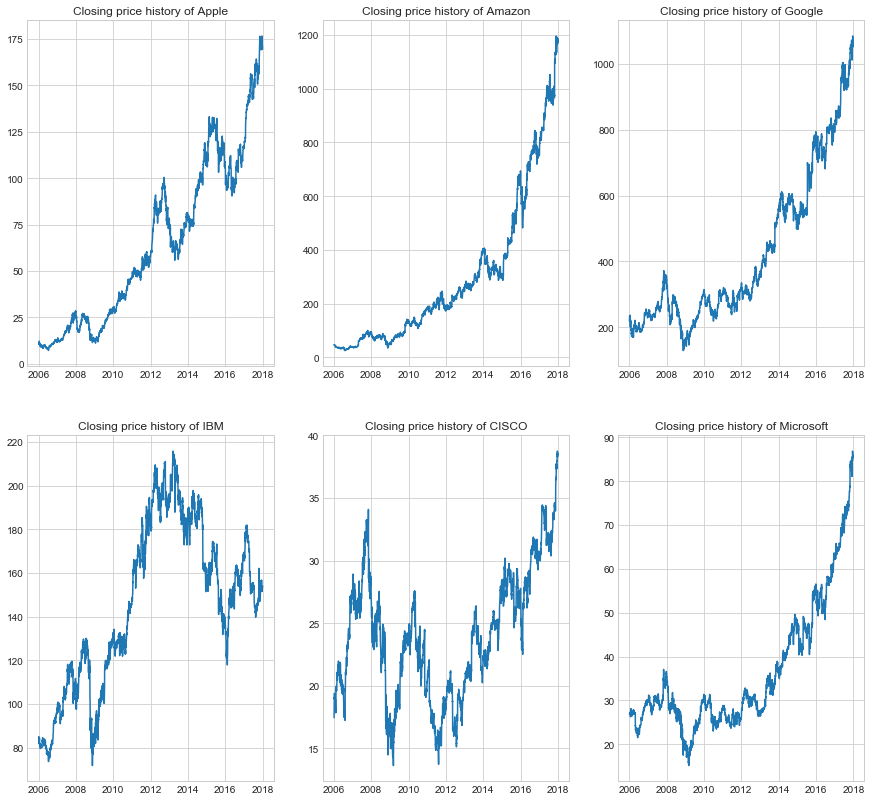

In [8]:
f, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(15,14))
ax1.plot(apple['Close'])
ax1.set_title('Closing price history of Apple')
ax2.plot(amazon['Close'])
ax2.set_title('Closing price history of Amazon')
ax3.plot(google['Close'])
ax3.set_title('Closing price history of Google')
ax4.plot(ibm['Close'])
ax4.set_title('Closing price history of IBM')
ax5.plot(cisco['Close'])
ax5.set_title('Closing price history of CISCO')
ax6.plot(microsoft['Close'])
ax6.set_title('Closing price history of Microsoft')


#### We can interpret that IBM closing price have seen a dip from 2014 while all other major tech companies have an increasing trend. Amazon and Google have been the clear leaders

# 2)Now let's plot the total volume of stock being traded

In [9]:
##Converting the values of volume in millions
apple['Volume'] = apple['Volume']/1000000
google['Volume'] = google['Volume']/1000000
ibm['Volume'] = ibm['Volume']/1000000
cisco['Volume'] = cisco['Volume']/1000000
microsoft['Volume'] = microsoft['Volume']/1000000
amazon['Volume'] = amazon['Volume']/1000000

Text(0.5,1,'Toal volume trade history of Microsoft')

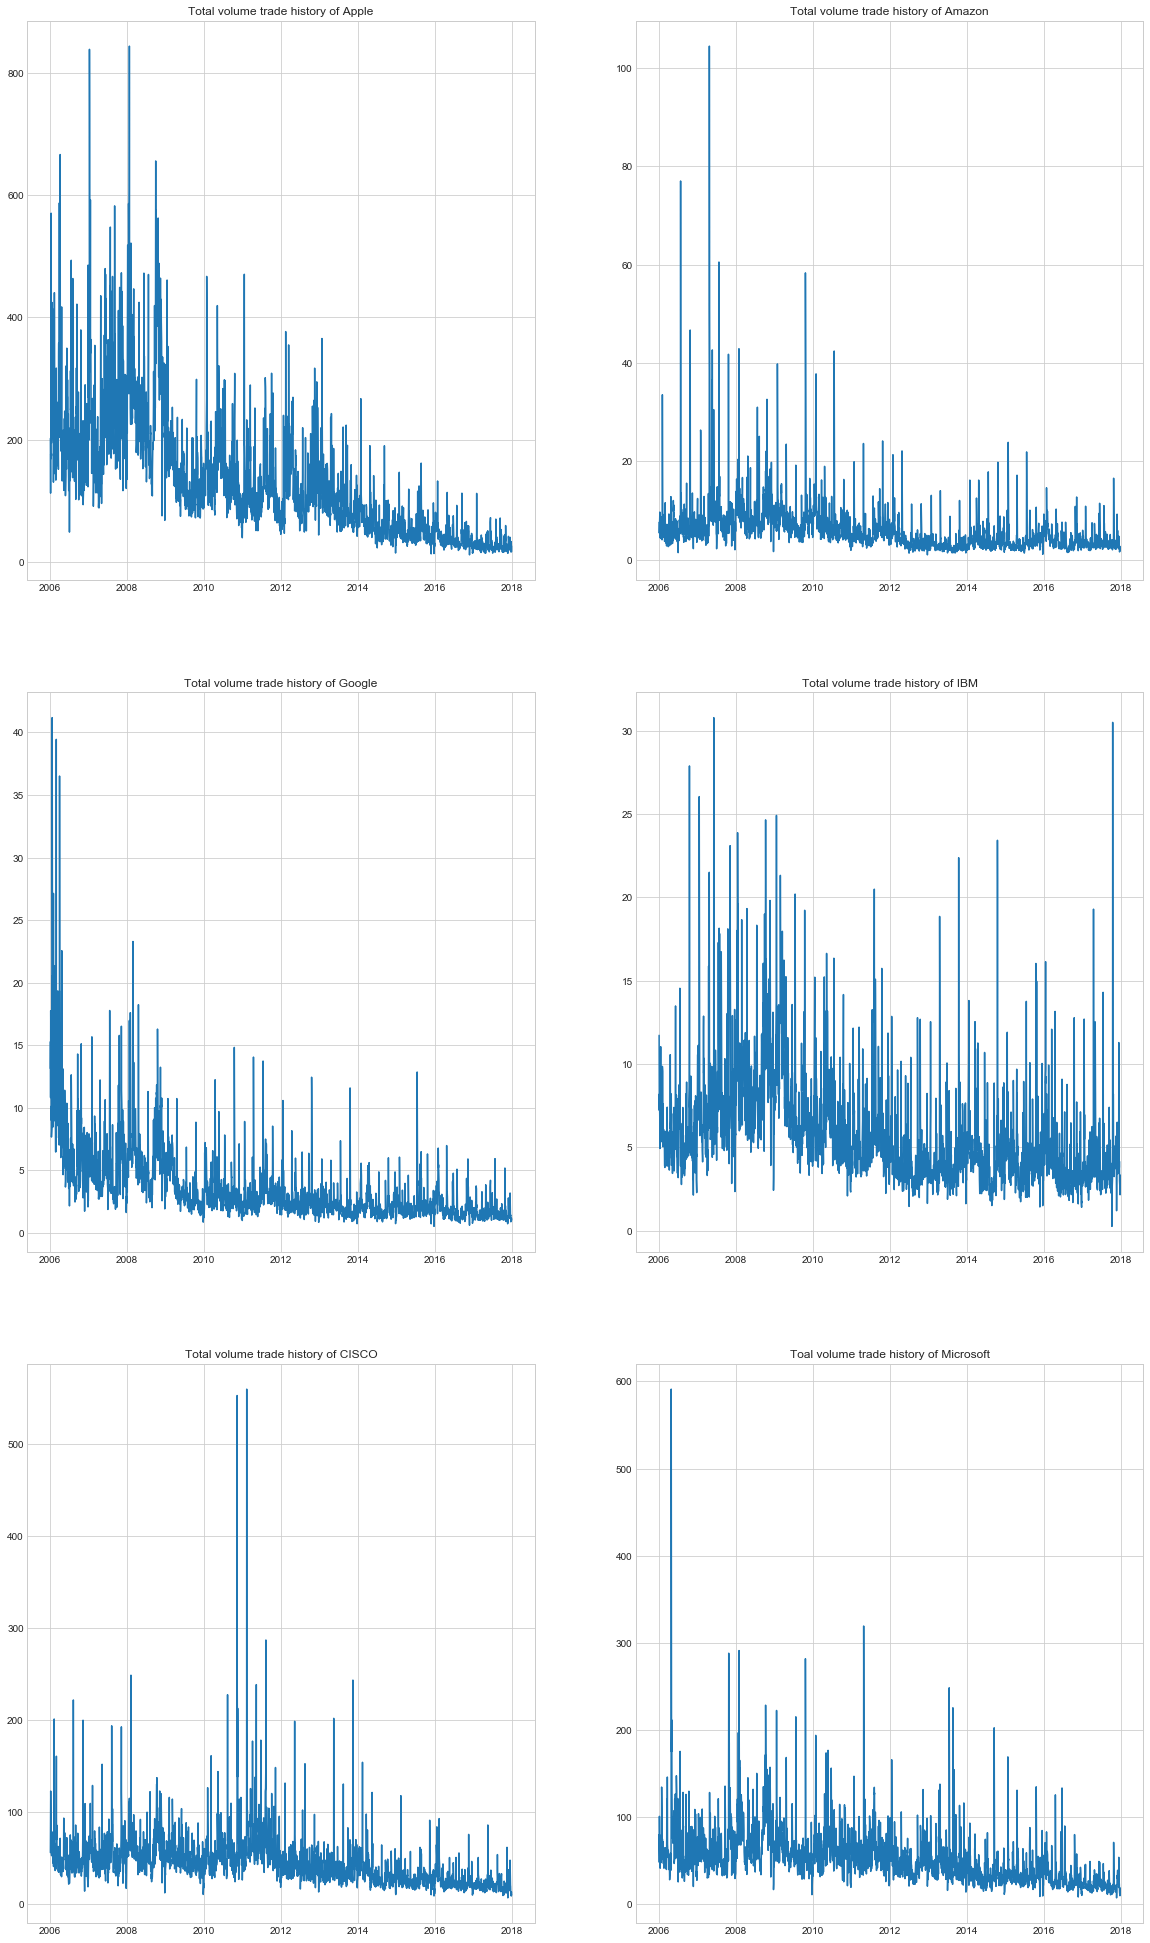

In [10]:
f, ((ax1, ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(20,35))
ax1.plot(apple['Volume'])
ax1.set_title('Total volume trade history of Apple')
ax2.plot(amazon['Volume'])
ax2.set_title('Total volume trade history of Amazon')
ax3.plot(google['Volume'])
ax3.set_title('Total volume trade history of Google')
ax4.plot(ibm['Volume'])
ax4.set_title('Total volume trade history of IBM')
ax5.plot(cisco['Volume'])
ax5.set_title('Total volume trade history of CISCO')
ax6.plot(microsoft['Volume'])
ax6.set_title('Toal volume trade history of Microsoft')


Volume is an important indicator in technical analysis as it is used to measure the relative worth of a market move. 
If the markets make a strong price movement, then the strength of that movement depends on the volume for that period. 
The higher the volume during the price move, the more significant the move.



Now we can analyze for  which price movement in history for the companies were relatively worth of a market move but
we will use moving average instead of closing price 

### 3)Analyze moving average for the 6 top tech companies

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out 
the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

A 10-day moving average would average out the closing prices for the first 10 days as the first data point. 
A 100-day moving average would average out the closing prices for the first 100 days as the first data point.



In [11]:
MA_day = [10,100]

for ma in MA_day:
    MovingAverage = 'MA for %s days' %(str(ma))
    apple[MovingAverage] = pd.rolling_mean(apple['Close'],ma)
    google[MovingAverage] = pd.rolling_mean(google['Close'],ma)
    ibm[MovingAverage] = pd.rolling_mean(ibm['Close'],ma)
    cisco[MovingAverage] = pd.rolling_mean(cisco['Close'],ma)
    microsoft[MovingAverage] = pd.rolling_mean(microsoft['Close'],ma)
    amazon[MovingAverage] = pd.rolling_mean(amazon['Close'],ma)
    

C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: Fut

Text(0.5,1,'Moving Average of Apple')

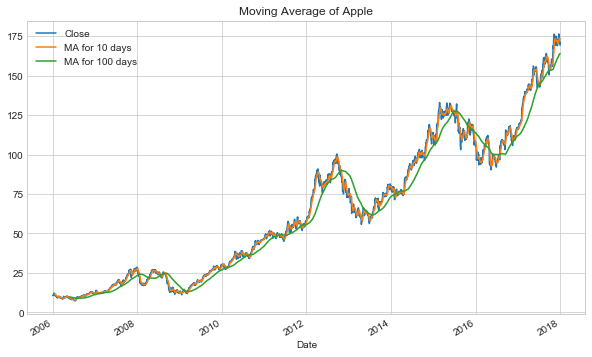

In [12]:
apple[['Close','MA for 10 days','MA for 100 days']].plot(subplots=False,figsize=(10,6)).set_title('Moving Average of Apple')

Text(0.5,1,'Moving Average of Google')

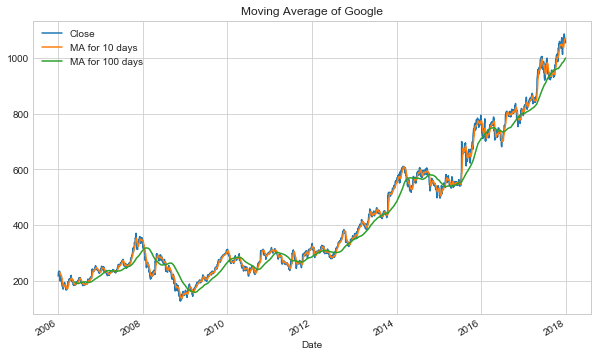

In [13]:
google[['Close','MA for 10 days','MA for 100 days']].plot(subplots=False,figsize=(10,6)).set_title('Moving Average of Google')

Text(0.5,1,'Moving Average of Amazon')

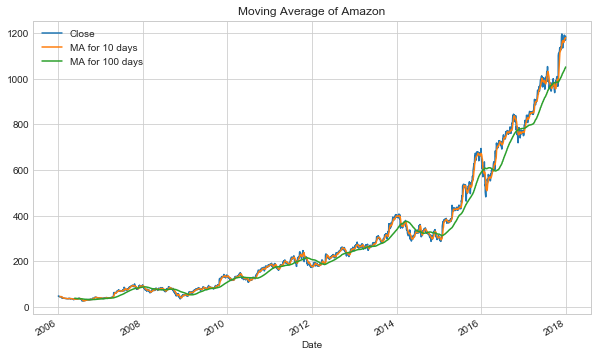

In [14]:
amazon[['Close','MA for 10 days','MA for 100 days']].plot(subplots=False,figsize=(10,6)).set_title('Moving Average of Amazon')

Text(0.5,1,'Moving Average of IBM')

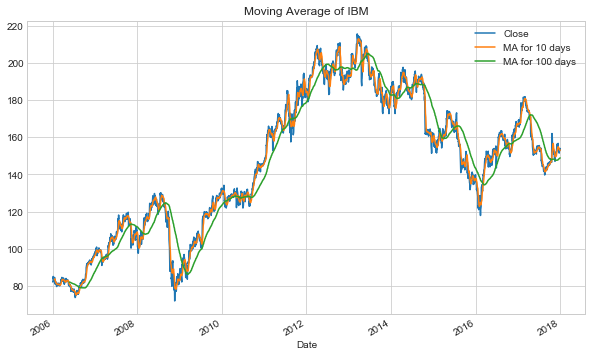

In [15]:
ibm[['Close','MA for 10 days','MA for 100 days']].plot(subplots=False,figsize=(10,6)).set_title('Moving Average of IBM')

Text(0.5,1,'Moving Average of CISCO')

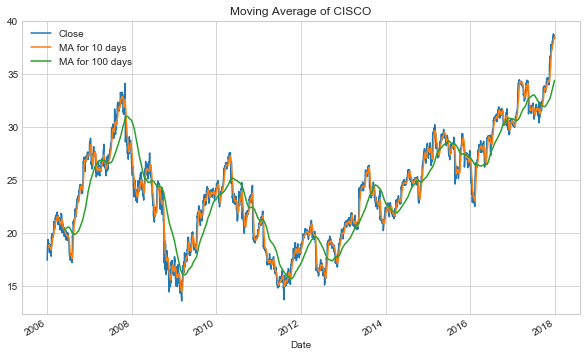

In [16]:
cisco[['Close','MA for 10 days','MA for 100 days']].plot(subplots=False,figsize=(10,6)).set_title('Moving Average of CISCO')

Text(0.5,1,'Moving Average of Microsoft')

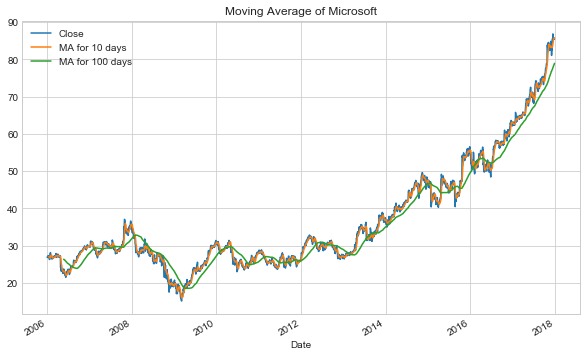

In [17]:
microsoft[['Close','MA for 10 days','MA for 100 days']].plot(subplots=False,figsize=(10,6)).set_title('Moving Average of Microsoft')

Text(0.5,1,'Moving Average of Microsoft')

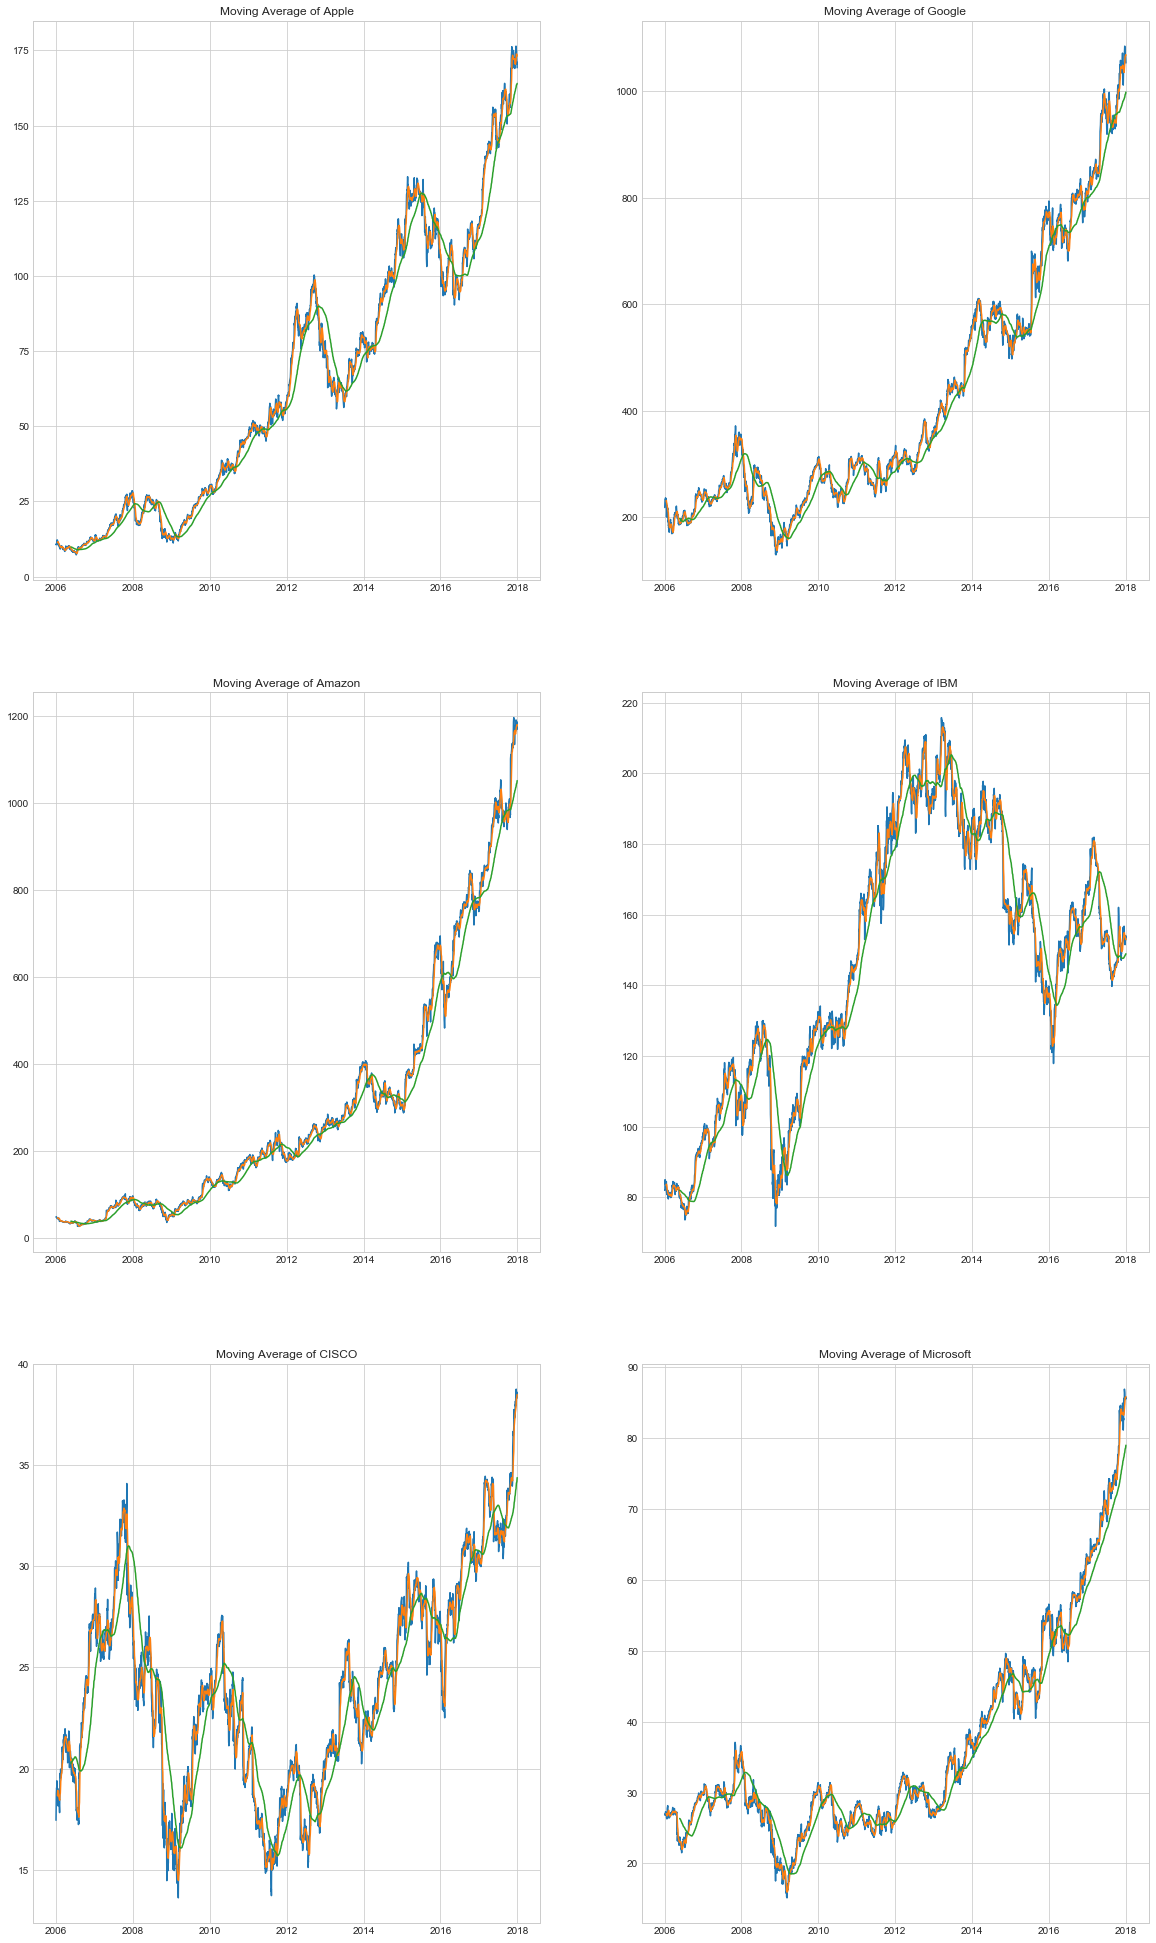

In [18]:
f, ((ax1, ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(20,35))
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
ax1.plot(apple[['Close','MA for 10 days','MA for 100 days']])
ax1.set_title('Moving Average of Apple')
ax2.plot(google[['Close','MA for 10 days','MA for 100 days']])
ax2.set_title('Moving Average of Google')
ax3.plot(amazon[['Close','MA for 10 days','MA for 100 days']])
ax3.set_title('Moving Average of Amazon')
ax4.plot(ibm[['Close','MA for 10 days','MA for 100 days']])
ax4.set_title('Moving Average of IBM')
ax5.plot(cisco[['Close','MA for 10 days','MA for 100 days']])
ax5.set_title('Moving Average of CISCO')
ax6.plot(microsoft[['Close','MA for 10 days','MA for 100 days']])
ax6.set_title('Moving Average of Microsoft')

### Interpretations : We are gonna see how volume and moving average together decides the strength of price movement's significance

Apple : We see constant price movement with positive trend throughout 2008-12 and also the volume of trade in that duration             was heavy suggesting that this price movement was very impactful in that duration

Google: There was a dip in the price in 2008-09 but the volume of trade was not significant in that duration suggesting that             this price movement was not impactful in company's stock market situation. 

IBM   : There was a big drop of price in 2008-09 and there was heavy volume of trade in that time frame suggesting that                 this price movement was very significant, while the price skyrocketed after 2010 throughout till 2013 and there was             decent amount of volume trade in that duration suggesting that this price movement was also significant

Microsoft : There was a price movement in 2008-09 and the volume of trade was also high suggesting an impactful price movement

Amazon   : There was a rapid price movement in positive direction for amazon throughout the history there was heavy trade                  during the initial price movement suggesting that people were interested in amazon looking at the prospect from                begining 
Cisco     : There was huge dip in price movement from 2007-09 but there was not high volume of trade suggesting this price                  that this price movement was not very significant 

### Interpreations : We can even interpret the trend and momentum just by looking at moving average

Moving averages also impart important trading signals on their own, or when two averages cross over. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates that it is in a downtrend. Similarly, upward momentum is confirmed with a bullish crossover, which occurs when a short-term moving average crosses above a longer-term moving average. Downward momentum is confirmed with a bearish crossover, which occurs when a short-term moving average crosses below a longer-term moving average.



Analysis of the most recent price movement

Apple       : Security - Uptrend , Momentum - Upward

Google      : Security - Uptrend , Momentum - Upward

Microsoft   : Security - Uptrend , Momentum -  Strongly Upward

CISCO       : Security - Uptrend , Momentum -  Strongly Upward

Amazon      : Security - Strong Uptrend , Momentum -  Strongly Upward

IBM         : Security - Downtrend , Momentum - Barely upward

## 4) Daily Return Analysis

#### We're now going to analyze the risk of the stock, to do so, we need to take a closer look at the daily changes of the stock

#### Creating daily return analysis plots for the major tech companies for the last 365 days

In [19]:
# We'll use pct_change to find the percent change for each day
apple['Daily Return'] = apple['Close'].pct_change()
google['Daily Return'] = google['Close'].pct_change()
amazon['Daily Return'] = amazon['Close'].pct_change()
cisco['Daily Return'] = cisco['Close'].pct_change()
ibm['Daily Return'] = ibm['Close'].pct_change()
microsoft['Daily Return'] = microsoft['Close'].pct_change()

In [20]:
## creating data frame for last 365 days for which we have record
apple_365 = apple.tail(365)
ibm_365 = ibm.tail(365)
cisco_365 = cisco.tail(365)
amazon_365 = amazon.tail(365)
google_365 = google.tail(365)
microsoft_365 = microsoft.tail(365)

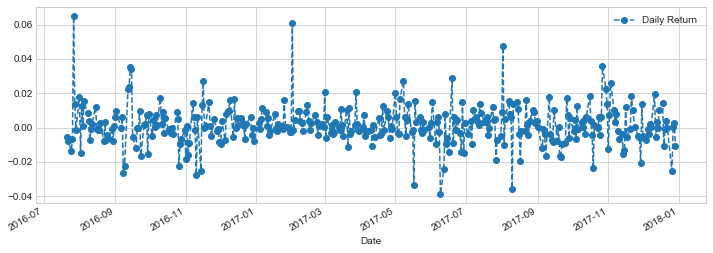

In [21]:
# Lets plot the daily return percentage
apple_365['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### We can interpret that apple stocks are not very volatile as of last one year as we can see very few hikes in the daily return plot and most of the days the change is quite at constant rate

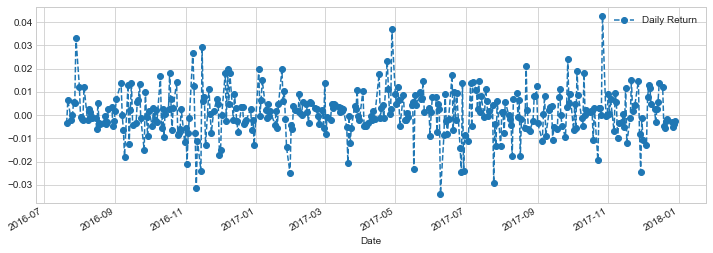

In [22]:
google_365['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### We can same thing about google but its stock was highly volaile towards the end of 2016 and showed some volatile movements throught out the year but had its peak towards the end so we can say that google stock shows higher returns november - december

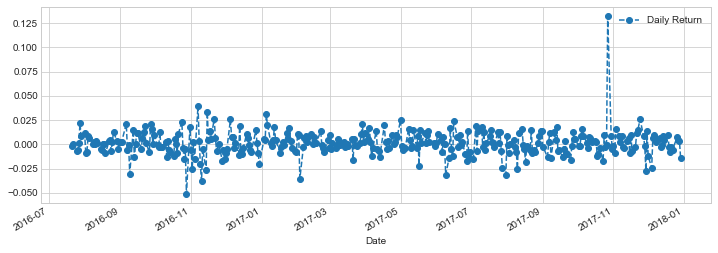

In [23]:
amazon_365['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### Amazon's stock has shown negligible volatile movements throught the last one year and was very stable

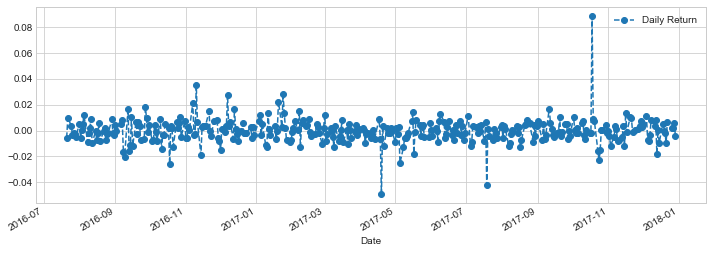

In [24]:
ibm_365['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### IBM's stock returns were very constant throughtout the last one year

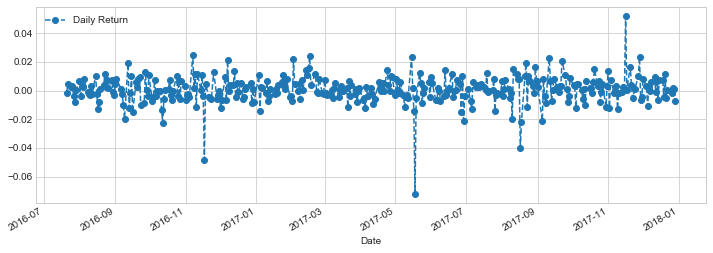

In [25]:
cisco_365['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### CISCO's stock return were constant throught out the year apart from one huge drop in june 2017

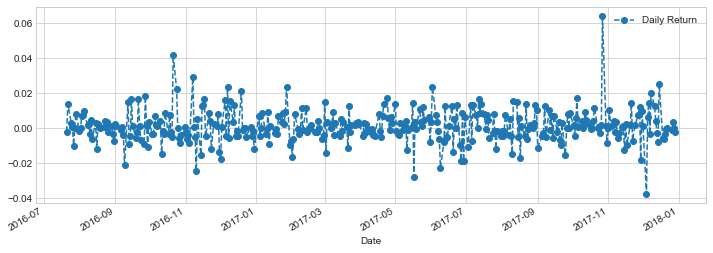

In [26]:
microsoft_365['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### Microsoft's stock was very stable till the mid of 2017 but was little volatile towards the end of the year

## 5) Comparing the daily returns and closing price of the six companies with each other 

In [27]:
## First comparing the daily returns 

In [28]:
tech_returns = pd.concat([apple['Daily Return'], amazon['Daily Return'],google['Daily Return'],microsoft['Daily Return'],cisco['Daily Return'],ibm['Daily Return']], axis=1, keys=['Apple', 'Amazon','Google','Microsoft','CISCO','IBM'])

In [29]:
tech_returns.head()

,Apple,Amazon,Google,Microsoft,CISCO,IBM
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002809,-0.006936,0.023000,0.004844,0.022923,-0.001340
2006-01-05,-0.007470,0.008466,0.013507,0.000742,0.028011,0.006711
2006-01-06,0.025400,0.004617,0.031924,-0.002964,0.022888,0.029697
2006-01-09,-0.003670,-0.016503,0.002660,-0.001858,0.015450,-0.014361


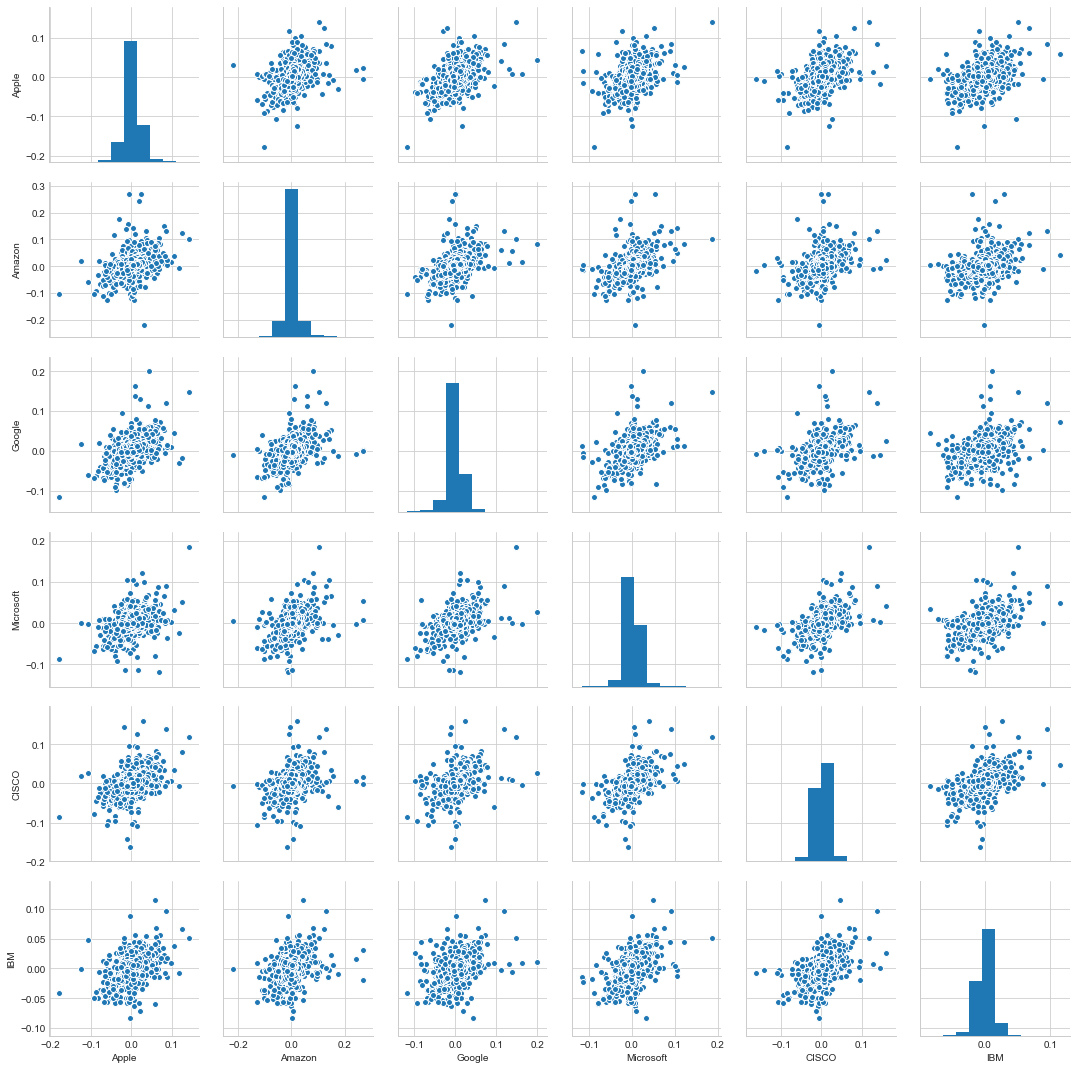

In [30]:

# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())

#### Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns

In [31]:
## Now comparing the closing prices

In [32]:
tech_closingprice = pd.concat([apple['Close'], amazon['Close'],google['Close'],microsoft['Close'],cisco['Close'],ibm['Close']], axis=1, keys=['Apple', 'Amazon','Google','Microsoft','CISCO','IBM'])

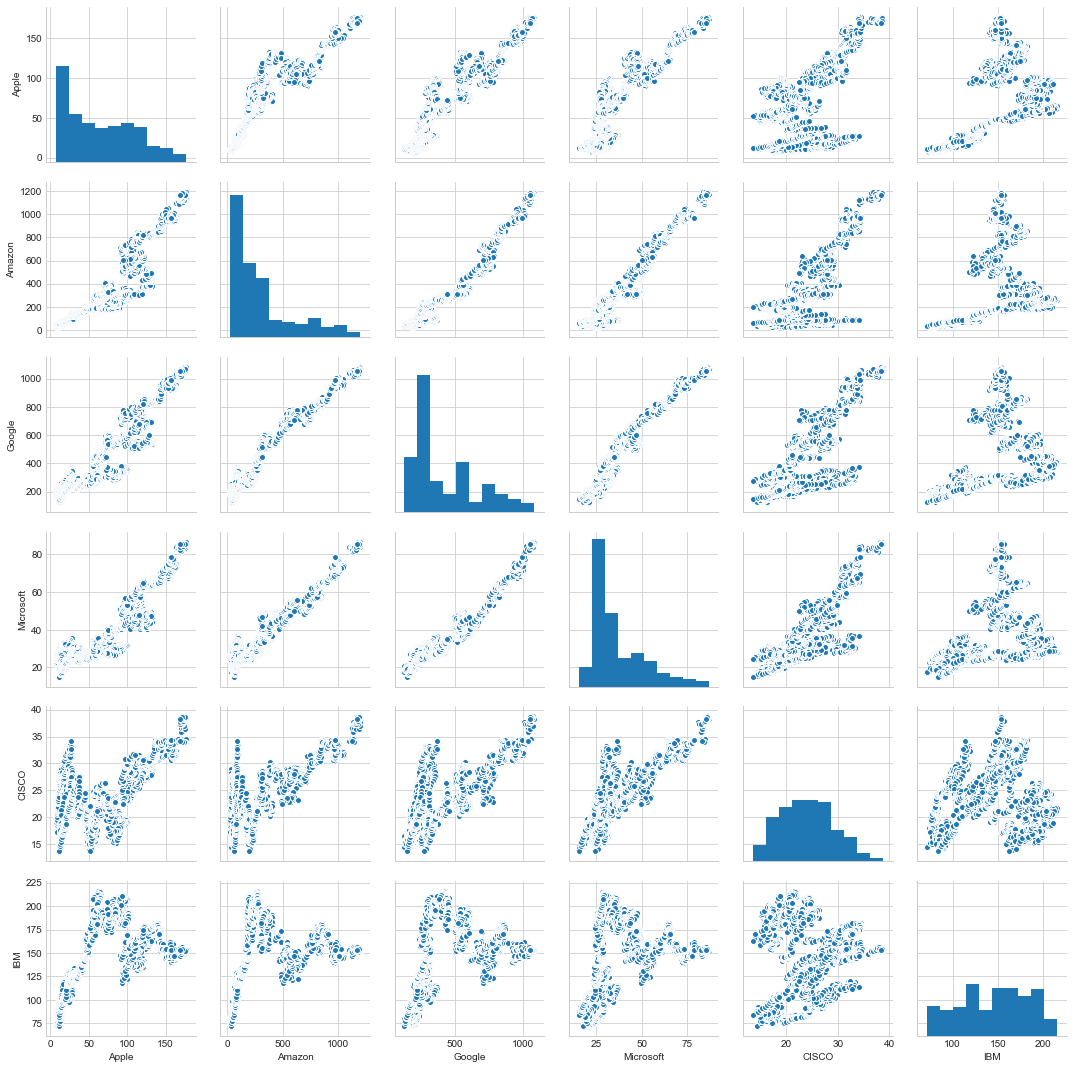

In [33]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_closingprice.dropna())

## 6)Correlation between companies (based on daily return and closing price)

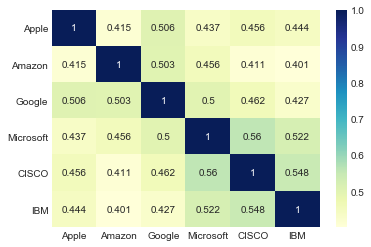

In [34]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

#### Now if we look how correlated the companies are in recent years

In [35]:
tech_recent_returns = tech_returns.tail(730)

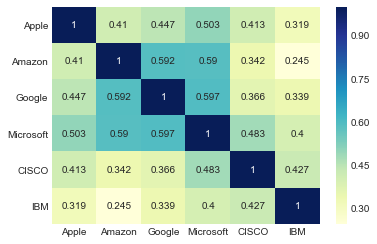

In [36]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_recent_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

#### Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return in recent years. Same can be said about google and microsoft 

#### Now plotting for closing price

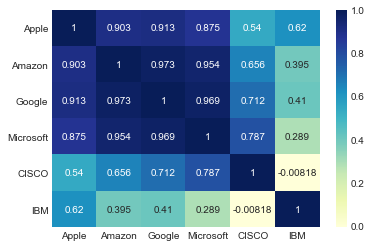

In [37]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(tech_closingprice.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [38]:
## Now plotting for last two years

In [39]:
tech_recent_closingprice = tech_closingprice.tail(730)

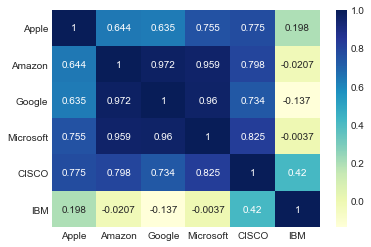

In [40]:
sns.heatmap(tech_recent_closingprice.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

#### We can now confirm that in recent years IBM stock is negatively correlated to the other major companies except apple.While all other companies are positively correlated to each other. This shows us that price increase in most of the tech companies' stock increases the chance of increase in stock price of other tech companies. IBM is the exception in our case study

# 7) Risk Analysis

#### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [41]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [42]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.4.1


In [43]:
import cufflinks as cf

In [44]:
# For offline use
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [45]:
# For Notebooks
init_notebook_mode(connected=True)

In [46]:
te=pd.DataFrame([rets.mean(), rets.std()],index=['mean','std'])
te=te.T.reset_index()
te.iplot(kind='scatter',x='mean',y='std',mode='markers',text='index',xTitle='Expected returns',yTitle='Risk')


#### While all the companies have positive expected returns, Amazon has the highest risk among them but also the highest expected return and IBM has least risk and also the lowest expected return

# 8)Value at Risk

#### Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

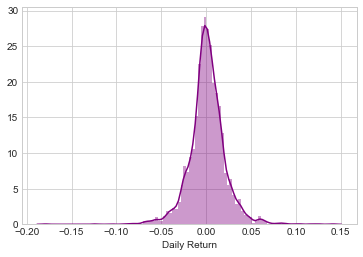

In [47]:

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(apple['Daily Return'].dropna(),bins=100,color='purple')

In [48]:
# The 0.05 empirical quantile of daily returns

# For Apple stocks
rets["Apple"].quantile(0.05)

-0.029502949648949235

### Interpretation - Based on stock data from 2006-18 for Apple
The 0.05 empirical quantile of daily returns is at -0.029. That means that with 95% confidence, our worst daily loss will not exceed 2.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.029 * 1,000,000 = $29,000.

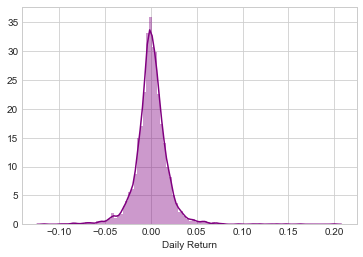

In [49]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(google['Daily Return'].dropna(),bins=100,color='purple')

In [50]:
# The 0.05 empirical quantile of daily returns

# For Google stocks
rets["Google"].quantile(0.05)

-0.026483417716499466

#### Interpretation - Based on stock data from 2006-18 for Google
The 0.05 empirical quantile of daily returns is at -0.029. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.029 * 1,000,000 = $26,000.

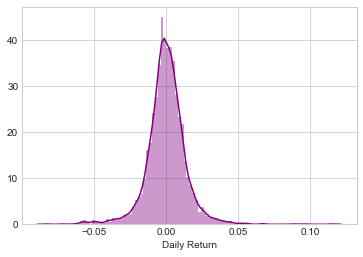

In [51]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(ibm['Daily Return'].dropna(),bins=100,color='purple')

In [52]:
# The 0.05 empirical quantile of daily returns

# For IBM stocks
rets["IBM"].quantile(0.05)

-0.019998443861266674

#### Interpretation - Based on stock data from 2006-18 for IBM
The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

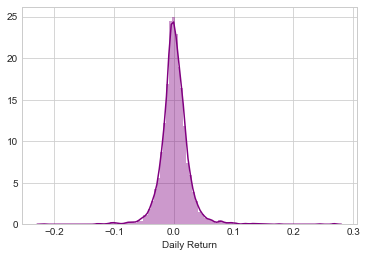

In [53]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(amazon['Daily Return'].dropna(),bins=100,color='purple')

In [54]:
# The 0.05 empirical quantile of daily returns

# For Amazon stocks
rets["Amazon"].quantile(0.05)

-0.032040184843674845

#### Interpretation - Based on stock data from 2006-18 for Amazon
The 0.05 empirical quantile of daily returns is at -0.032. That means that with 95% confidence, our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

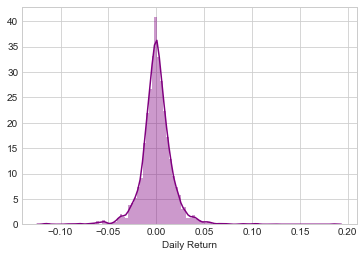

In [55]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(microsoft['Daily Return'].dropna(),bins=100,color='purple')

In [56]:
# The 0.05 empirical quantile of daily returns

# For Microsoft stocks
rets["Microsoft"].quantile(0.05)

-0.023802823820768

#### Interpretation - Based on stock data from 2006-18 for Microsoft
The 0.05 empirical quantile of daily returns is at -0.023. That means that with 95% confidence, our worst daily loss will not exceed 2.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.023 * 1,000,000 = $23,000.

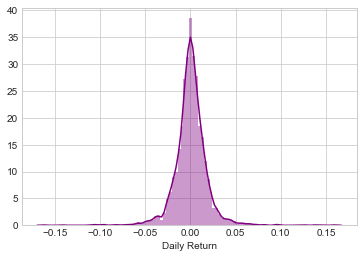

In [57]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(cisco['Daily Return'].dropna(),bins=100,color='purple')

In [58]:
# The 0.05 empirical quantile of daily returns

# For cisco stocks
rets["CISCO"].quantile(0.05)

-0.025268276405208928

#### Interpretation - Based on stock data from 2006-18 for CISCO
The 0.05 empirical quantile of daily returns is at -0.025. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.023 * 1,000,000 = $25,000.

# 9) Commodity Channel Index

#### The Commodity Channel Index (CCI) is a versatile indicator that can be used to identify a new trend or warn of extreme conditions. In general, CCI measures the current price level relative to an average price level over a given period of time. CCI is relatively high when prices are far above their average. CCI is relatively low when prices are far below their average. In this manner, CCI can be used to identify overbought and oversold levels.

C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()

C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()



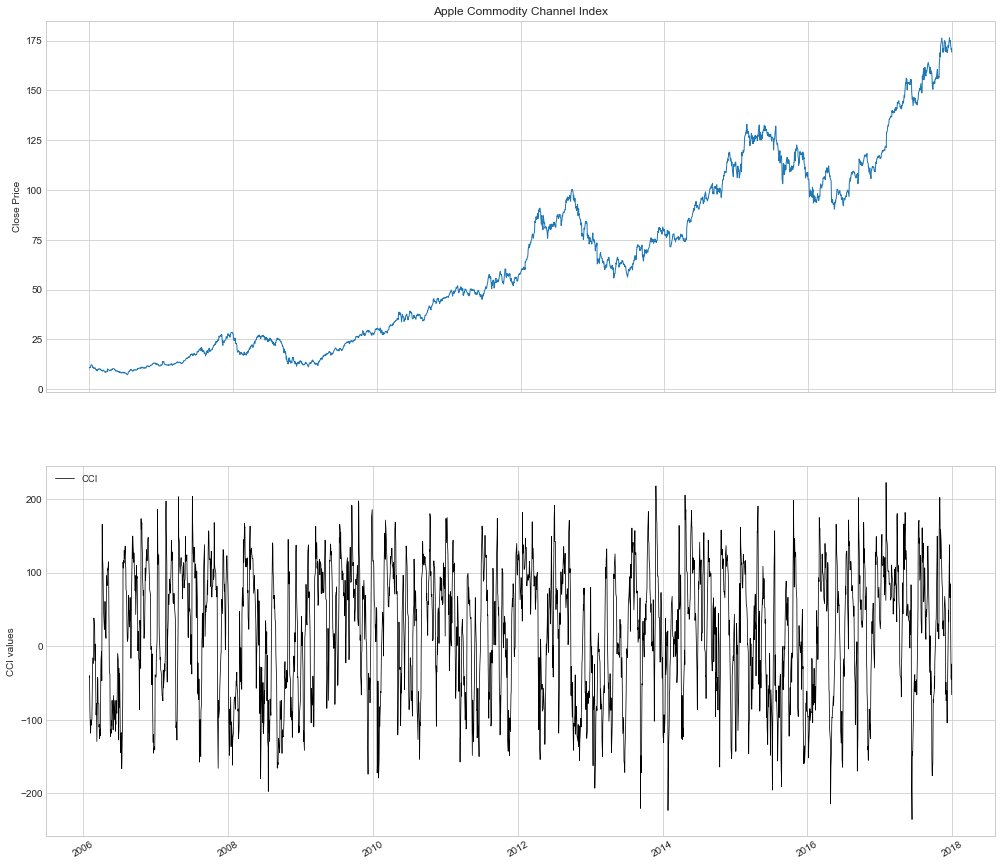

In [59]:
# Commodity Channel Index 
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015*pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 data = data.join(CCI) 
 return data

# Retrieve the Nifty data from Yahoo finance:
data = apple 


# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
NI = CCI(data, n)
CCI = NI['CCI']

# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(17,15))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('Apple Commodity Channel Index')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

#### surges above +100 reflect strong price action that can signal the start of an uptrend. Plunges below -100 reflect weak price action that can signal the start of a downtrend.

#### We can use this chart to interpret when a downwardtrend will start or when an upward trend will start 

# 10) Relative Strength Indicator (RSI)

#### The Relative Strength Index (RSI), is a momentum oscillator that measures the speed and change of price movements.The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30. Signals can be generated by looking for divergences and failure swings.

In [60]:
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) 
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) 
 d = d.drop(d.index[:(period-1)])
 rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
 pd.stats.moments.ewma(d, com=period-1, adjust=False)
 return 100 - 100 / (1 + rs)

In [61]:
apple['RSI'] = RSI(apple['Close'], 14)
amazon['RSI'] = RSI(amazon['Close'],14)
ibm['RSI'] = RSI(ibm['Close'],14)


C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()



Text(0,0.5,'RSI')

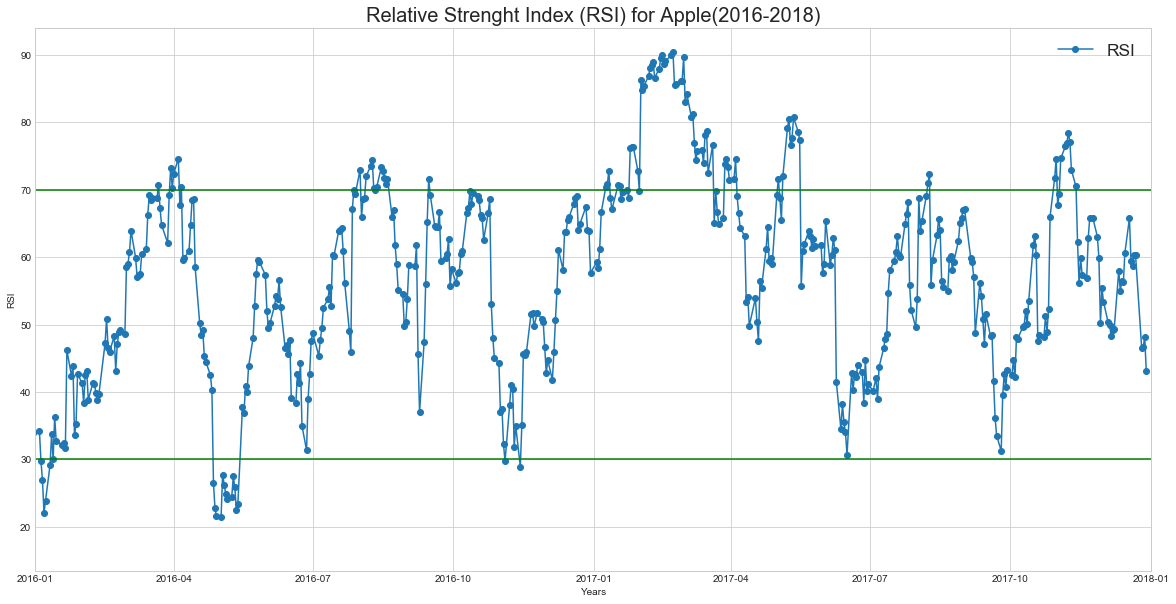

In [62]:
plt.figure(figsize=(20,10))
plt.plot(apple['RSI'],marker='o')
plt.xlim('2016','2018')
plt.title('Relative Strenght Index (RSI) for Apple(2016-2018)',fontsize=20)
plt.axhline(y=30,color = 'g',)
plt.axhline(y=70,color = 'g')
plt.legend(fontsize ='xx-large')
plt.xlabel('Years')
plt.ylabel('RSI')


#### Using this graph we can analyze when the stocks were overbought and when they were oversold
We can see that in between feb 2017 - april 2017 apple stocks was heavily overbought RSI>70

We can see it was oversold in between may2016 - june 2016 RSI <30


Text(0,0.5,'RSI')

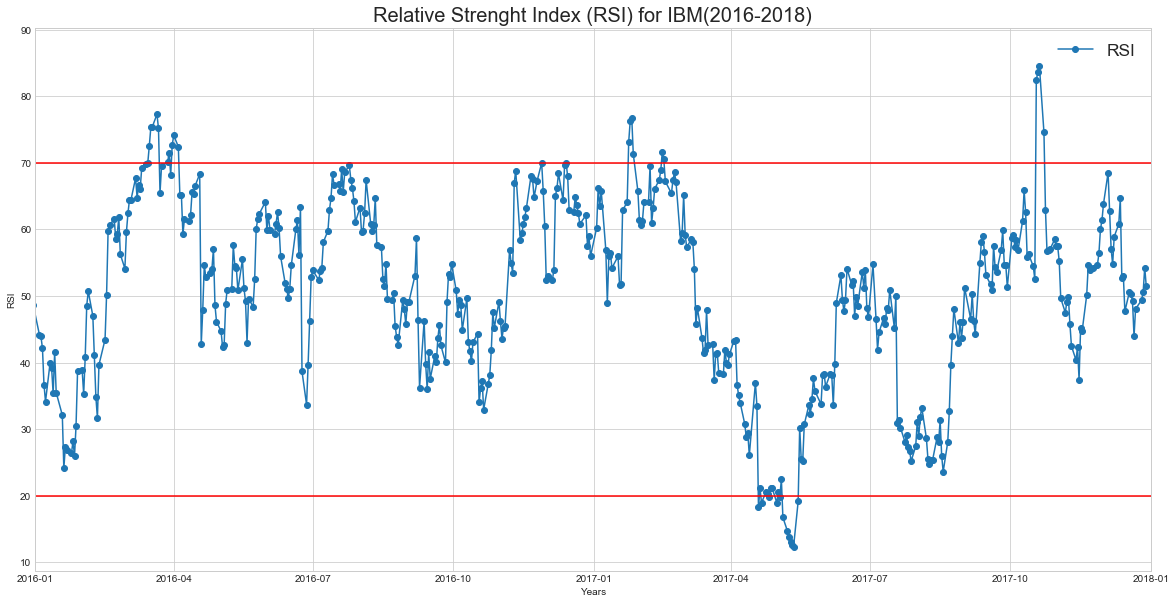

In [63]:
plt.figure(figsize=(20,10))
plt.plot(ibm['RSI'],marker='o')
plt.xlim('2016','2018')
plt.title('Relative Strenght Index (RSI) for IBM(2016-2018)',fontsize=20)
plt.axhline(y=20,color = 'r',)
plt.axhline(y=70,color = 'r')
plt.legend(fontsize ='xx-large')
plt.xlabel('Years')
plt.ylabel('RSI')

#### Using this graph we can analyze when the stocks were overbought and when they were oversold

We can see that in between mar 2016 - april 2016 IBM stocks was overbought and it was most overbought in start of nov 2017 (RSI>70)

And it was  over sold in may 2017 - june 2017 (RSI <30)

## 11)Using Regression to predict closing price for the last 30 days and plotting the     regression

#### For this we create a prediction model and then compare the predicted closing price to actual closing price of the last 30 days of the Apple stockdata 

In [64]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm



C:\Users\saura\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [65]:
apple_reg = apple[['Close']]

In [66]:
##We want to predict 30 days into the future,
forecast_out = int(30) # predicting 30 days into future
apple_reg['Prediction'] = apple_reg[['Close']].shift(-forecast_out) #  label column with data shifted 30 unit

C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [67]:
## Our X will be an array consisting of our Close values, and so we want to drop the Prediction column. 

In [68]:
X = np.array(apple_reg.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [69]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [70]:
y = np.array(apple_reg['Prediction'])
y = y[:-forecast_out]

In [71]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [72]:

# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.977810735748


In [73]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[ 174.23143901  173.26853854  173.09623003  176.29914109  178.14385569
  178.15399148  177.26204157  176.22819053  172.58944031  174.9916236
  174.18076004  172.91378573  172.75161302  172.11305796  172.42726759
  172.47794657  175.82275875  174.83958668  175.41732697  175.366648
  177.14041203  179.62368169  177.71815232  177.52557223  178.19453466
  178.19453466  173.69424191  173.72464929  174.21116743  172.33604544]


In [74]:
actual_closing_last30 = apple_reg['Close'].tail(30)

In [75]:
te = pd.DataFrame(
    {'Actual': actual_closing_last30,
     'Predicted': forecast_prediction
     
    })

In [76]:
te.head()

,Actual,Predicted
Date,,
2017-11-16,171.10,174.231439
2017-11-17,170.15,173.268539
2017-11-20,169.98,173.096230
2017-11-21,173.14,176.299141
2017-11-22,174.96,178.143856


In [77]:
te.iplot(x='Actual',y='Predicted',mode='markers',xTitle='Actual closing price',yTitle='Predicted closing price')